### Breast Cancer Wisconsin Analysis

Using ensemble Methods (Tree Based Models) to model the "Breast Cancer Wisconsin (Diagnostic)" data set. This models will predict if the cancer is benign or malignant and also show the attributes that are most informative for predicting the breast cancer.

This dataset is originally from the University of California Irvine Machine Learning Repository. The objective of the dataset is to diagnostically predict whether a breast cancer is benign or malignant and deplay the attributes that are most informative for predicting the breast cancer, based on certain diagnostic measurements included in the dataset. According to the dataset information, several constraints were placed on the selection of these instances from a larger database.

In [1]:
# open the data file

import sys
import csv

# pandas reference: https://pandas.pydata.org/docs/reference/index.html
import pandas

try:
    df = pandas.read_csv( 'problem1_data.csv', index_col=False )
except Exception as x:
    print( 'there was an error trying to open the data file: ' + str ( x ))
    sys.exit()

# read about a pandas DataFrame here: 
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

# print information about the size of the data set
N = len( df.columns )
M = len( df.values )
print( 'number of attributes (N) = %d, number of instances (M) = %d\n' % ( N, M ))

# print information about the attributes and their data types
print( '%25s %25s' % ( 'attribute', 'data type' ))
for ( i,a,t ) in zip( range(N), df.columns, df.dtypes ):
    print( '%d %25s %25s' % ( i, a, t ))

number of attributes (N) = 32, number of instances (M) = 569

                attribute                 data type
0                        id                     int64
1                 diagnosis                    object
2               radius_mean                   float64
3              texture_mean                   float64
4            perimeter_mean                   float64
5                 area_mean                   float64
6           smoothness_mean                   float64
7          compactness_mean                   float64
8            concavity_mean                   float64
9       concave points_mean                   float64
10             symmetry_mean                   float64
11    fractal_dimension_mean                   float64
12                 radius_se                   float64
13                texture_se                   float64
14              perimeter_se                   float64
15                   area_se                   float64
16             s

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("problem1_data.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
# check the first few rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
# check the last few rows of the dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [8]:
# randomly select any five rows
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
415,905686,B,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.021790,...,13.05,27.21,85.09,522.9,0.14260,0.2187,0.11640,0.08263,0.3075,0.07351
364,9010877,B,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.014730,...,14.73,21.70,93.76,663.5,0.12130,0.1676,0.13640,0.06987,0.2741,0.07582
277,8911670,M,18.81,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.058430,...,19.96,24.30,129.00,1236.0,0.12430,0.1160,0.22100,0.12940,0.2567,0.05737
346,898678,B,12.06,18.90,76.66,445.3,0.08386,0.05794,0.00751,0.008488,...,13.64,27.06,86.54,562.6,0.12890,0.1352,0.04506,0.05093,0.2880,0.08083
354,901011,B,11.14,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.014710,...,12.12,15.82,79.62,453.5,0.08864,0.1256,0.12010,0.03922,0.2576,0.07018


check online for definition of each column e.g define diagnosis, radius mean, texture mean, perimter mean etc

In [4]:
# check first 5 rows of dataset

df.shape

(569, 32)

There are 32 attributes and 569 instances in the dataset.

In [10]:
# check the attributes of the dataset
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
df.duplicated().sum()

0

In [16]:
# check for missing values

dataframe.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Even though there are no missing values in the dataset according to the above result, \n
this does not mean the dataset is clean. No missing values does not mean clean dataset.

In [14]:
# performing some simple statistics on the dataset

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
# performing some simple statistics on the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [16]:
# performing some simple descriptive statistics on the dataset

df.describe(include = "all") # this will displace a descriptive statistical table for both numeric and nominal attributes

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [3]:
# performing some simple statistics on the dataset and transposing

df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,569.0,NaN,NaN,NaN,30371831.432337,125020585.612224,8670.0,869218.0,906024.0,8813129.0,911320502.0
diagnosis,569,2,B,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,569.0,NaN,NaN,NaN,14.127292,3.524049,6.981,11.7,13.37,15.78,28.11
texture_mean,569.0,NaN,NaN,NaN,19.289649,4.301036,9.71,16.17,18.84,21.8,39.28
perimeter_mean,569.0,NaN,NaN,NaN,91.969033,24.298981,43.79,75.17,86.24,104.1,188.5
area_mean,569.0,NaN,NaN,NaN,654.889104,351.914129,143.5,420.3,551.1,782.7,2501.0
smoothness_mean,569.0,NaN,NaN,NaN,0.09636,0.014064,0.05263,0.08637,0.09587,0.1053,0.1634
compactness_mean,569.0,NaN,NaN,NaN,0.104341,0.052813,0.01938,0.06492,0.09263,0.1304,0.3454
concavity_mean,569.0,NaN,NaN,NaN,0.088799,0.07972,0.0,0.02956,0.06154,0.1307,0.4268
concave points_mean,569.0,NaN,NaN,NaN,0.048919,0.038803,0.0,0.02031,0.0335,0.074,0.2012


### From the above table:

#### categorical attribute:

- there are 569 instances
- there are no missing values
- there are two unique categorical values for diagnosis attribute: B and M
- B category comes top having 357 instances while M category has 212 instances


#### numerical attribute:

Even though there are some attributes that should not be zero, the minimum concavity_mean, concave points_mean, concavity_se, concave_points_se, concavity_worst and concave_points_worst are all zero (0.00)

mean of each numerical attribute:
- radius_mean	
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave_points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave_points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave_points_worst
- symmetry_worst
- fractal_dimension_worst


standard deviation of each numerical attribute:
- radius_mean	
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave_points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave_points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave_points_worst
- symmetry_worst
- fractal_dimension_worst

Minimum value of each numerical attribute:
- radius_mean	
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave_points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave_points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave_points_worst
- symmetry_worst
- fractal_dimension_worst

maximum value of each numerical attribute:
- radius_mean	
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave_points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave_points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave_points_worst
- symmetry_worst
- fractal_dimension_worst


50% (median) of each numerical attribute:
- radius_mean	
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave_points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave_points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave_points_worst
- symmetry_worst
- fractal_dimension_worst

25% (lower quartile) of each numerical attribute:
- radius_mean	
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave_points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave_points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave_points_worst
- symmetry_worst
- fractal_dimension_worst


75% (higher quartile) of each numerical attribute:
- radius_mean	
- texture_mean
- perimeter_mean
- area_mean
- smoothness_mean
- compactness_mean
- concavity_mean
- concave_points_mean
- symmetry_mean
- fractal_dimension_mean
- radius_se
- texture_se
- perimeter_se
- area_se
- smoothness_se
- compactness_se
- concavity_se
- concave_points_se
- symmetry_se
- fractal_dimension_se
- radius_worst
- texture_worst
- perimeter_worst
- area_worst
- smoothness_worst
- compactness_worst
- concavity_worst
- concave_points_worst
- symmetry_worst
- fractal_dimension_worst

In [18]:
df["radius_mean"].mean()

14.127291739894563

In [19]:
df["texture_mean"].mean()

19.28964850615117

In [20]:
df["texture_mean"].std()

4.301035768166949

In [21]:
df["texture_mean"].min()

9.71

In [22]:
df["texture_mean"].max()

39.28

- concavity_mean, concave_points_mean, concavity_se, concave_points_se, concavity_worst and  concave_points_worst attributes \n
all have 0 as minumum values, check why and explain.

### Attributes Understanding in the dataset

In [23]:
# unique diagnosis

df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [24]:
# number of unique diagnosis

df["diagnosis"].nunique()

2

In [25]:
# unique diagnosis

df["id"].nunique() # this simply means there are no duplicate

569

- correlation it is a measure of the strength of relation between two quantitive variables. it ranges between -1 and 1. \n Correlation values that are closer to positive one (1) indicates high positive relationship between the two variables or attributes. Similarly, correlation values that are closer to negative one (-1) indicates high negative relationship between the attributes.

In [26]:
df.corr().T

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [43]:
# filtering for only benign

df_b = df[df["diagnosis"] == "B"]
df_b

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,925277,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,925292,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,925311,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


In [44]:
# filtering for only benign

df_b[df_b["diagnosis"] == "B"].head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [45]:
# filtering for only benign

df_b[df_b["diagnosis"] == "B"].sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
364,9010877,B,13.40,16.95,85.48,552.4,0.07937,0.05696,0.02181,0.01473,...,14.73,21.70,93.76,663.5,0.1213,0.1676,0.13640,0.06987,0.2741,0.07582
142,869218,B,11.43,17.31,73.66,398.0,0.10920,0.09486,0.02031,0.01861,...,12.78,26.76,82.66,503.0,0.1413,0.1792,0.07708,0.06402,0.2584,0.08096
220,8812816,B,13.65,13.16,87.88,568.9,0.09646,0.08711,0.03888,0.02563,...,15.34,16.35,99.71,706.2,0.1311,0.2474,0.17590,0.08056,0.2380,0.08718
431,907915,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.24030,0.07370,0.2556,0.09359
324,89511501,B,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,...,13.75,21.38,91.11,583.1,0.1256,0.1928,0.11670,0.05556,0.2661,0.07961


In [46]:
# filtering for only benign

df_b[df_b["diagnosis"] == "B"].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
std,1.167397e+08,1.780512,3.995125,11.807438,134.287118,0.013446,0.033750,0.043442,0.015909,0.024807,...,1.981368,5.493955,13.527091,163.601424,0.020013,0.092180,0.140368,0.035797,0.041745,0.013804
min,8.913000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156600,0.055210
25%,8.746620e+05,11.080000,15.150000,70.870000,378.200000,0.083060,0.055620,0.020310,0.015020,0.158000,...,12.080000,19.580000,78.270000,447.100000,0.110400,0.112000,0.077080,0.051040,0.240600,0.070090
50%,9.089160e+05,12.200000,17.390000,78.180000,458.400000,0.090760,0.075290,0.037090,0.023440,0.171400,...,13.350000,22.820000,86.920000,547.400000,0.125400,0.169800,0.141200,0.074310,0.268700,0.077120
75%,8.812816e+06,13.370000,19.760000,86.100000,551.100000,0.100700,0.097550,0.059990,0.032510,0.189000,...,14.800000,26.510000,96.590000,670.000000,0.137600,0.230200,0.221600,0.097490,0.298300,0.085410
max,9.113205e+08,17.850000,33.810000,114.600000,992.100000,0.163400,0.223900,0.410800,0.085340,0.274300,...,19.820000,41.780000,127.100000,1210.000000,0.200600,0.584900,1.252000,0.175000,0.422800,0.148600


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# check for correlation among instances in B category

b_cor = df_b[df_b["diagnosis"] == "B"].corr()

plt.figure(figsize = (21, 21))
sns.heatmap(b_cor, annot = True, vmin = -1, vmax = 1, cmap = "Spectral");

NameError: name 'df_b' is not defined

In [50]:
# filtering for only malignant

df_m = df[df["diagnosis"] == "M"].head()
df_m

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
# filtering for only malignant

df_m[df_m["diagnosis"] == "M"].describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000
mean,5.093848e+07,17.992000,16.824000,119.676000,1042.620000,0.111108,0.186568,0.204760,0.110934,0.214120,...,22.27800,21.888000,149.394000,1565.340000,0.155520,0.469600,0.498160,0.222880,0.39932,0.109056
std,4.573126e+07,3.807929,4.495134,23.985368,388.421771,0.021523,0.090845,0.078139,0.028872,0.035668,...,4.27208,4.605814,31.217506,586.182504,0.033351,0.294925,0.199403,0.045873,0.17109,0.039020
min,8.423020e+05,11.420000,10.380000,77.580000,386.100000,0.084740,0.078640,0.086900,0.070170,0.180900,...,14.91000,16.670000,98.870000,567.700000,0.123800,0.186600,0.241600,0.162500,0.23640,0.076780
25%,8.425170e+05,17.990000,14.340000,122.800000,1001.000000,0.100300,0.132800,0.197400,0.104300,0.181200,...,22.54000,17.330000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.186000,0.27500,0.087580
50%,8.430090e+07,19.690000,17.770000,130.000000,1203.000000,0.109600,0.159900,0.198000,0.105200,0.206900,...,23.57000,23.410000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.36130,0.089020
75%,8.434830e+07,20.290000,20.380000,132.900000,1297.000000,0.118400,0.277600,0.241400,0.127900,0.241900,...,24.99000,25.530000,158.800000,1956.000000,0.162200,0.665600,0.686900,0.257500,0.46010,0.118900
max,8.435840e+07,20.570000,21.250000,135.100000,1326.000000,0.142500,0.283900,0.300100,0.147100,0.259700,...,25.38000,26.500000,184.600000,2019.000000,0.209800,0.866300,0.711900,0.265400,0.66380,0.173000


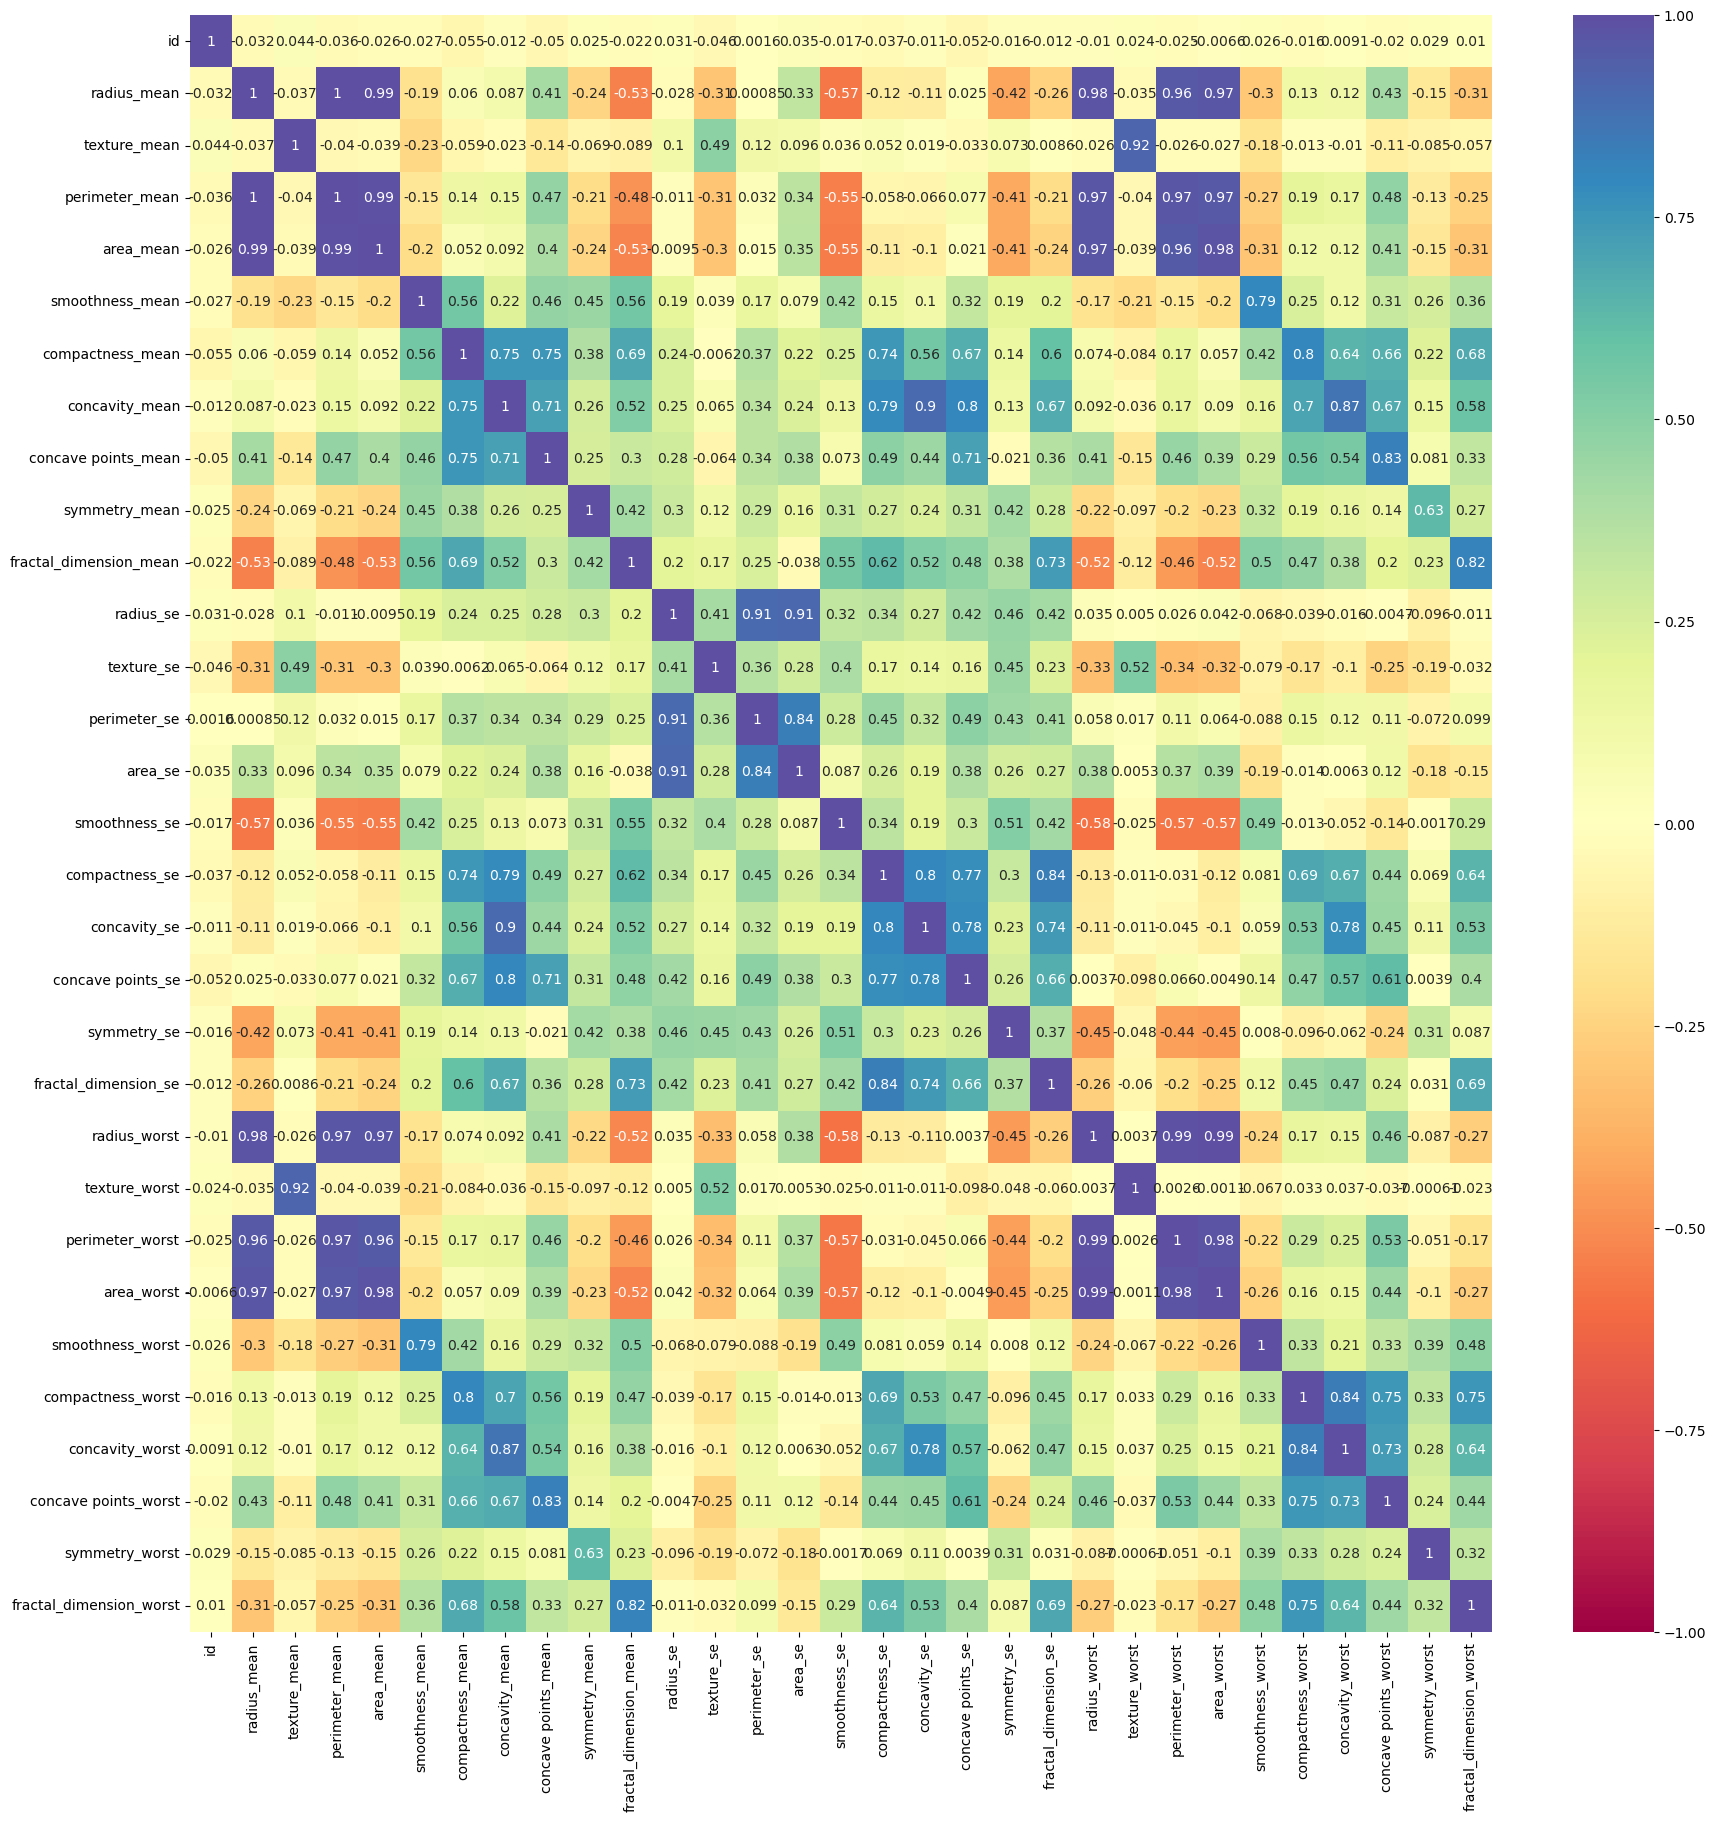

In [52]:
# check for correlation among instances in M category

m_cor = df_m[df_m["diagnosis"] == "M"].corr()

plt.figure(figsize = (21, 21))
sns.heatmap(b_cor, annot = True, vmin = -1, vmax = 1, cmap = "Spectral");

### Dataset Visualization

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
import seaborn as sns # for visualization

In [39]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=0, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

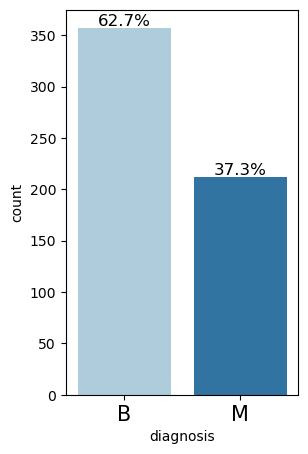

In [40]:
labeled_barplot(data = df, feature = "diagnosis", perc = True)

- Observation: the dataset is not balanced

In [41]:
df["diagnosis"].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

- observing the plot above, it shows the dataset is not balanced. There are more instances with B (Benign ) category of cancer \n
(62.7%) while (37.3%) with M category (Malignant). There are no equal number of instances in both categories which makes the dataset\n
imbalanced. The model may not perform well in such dataset.


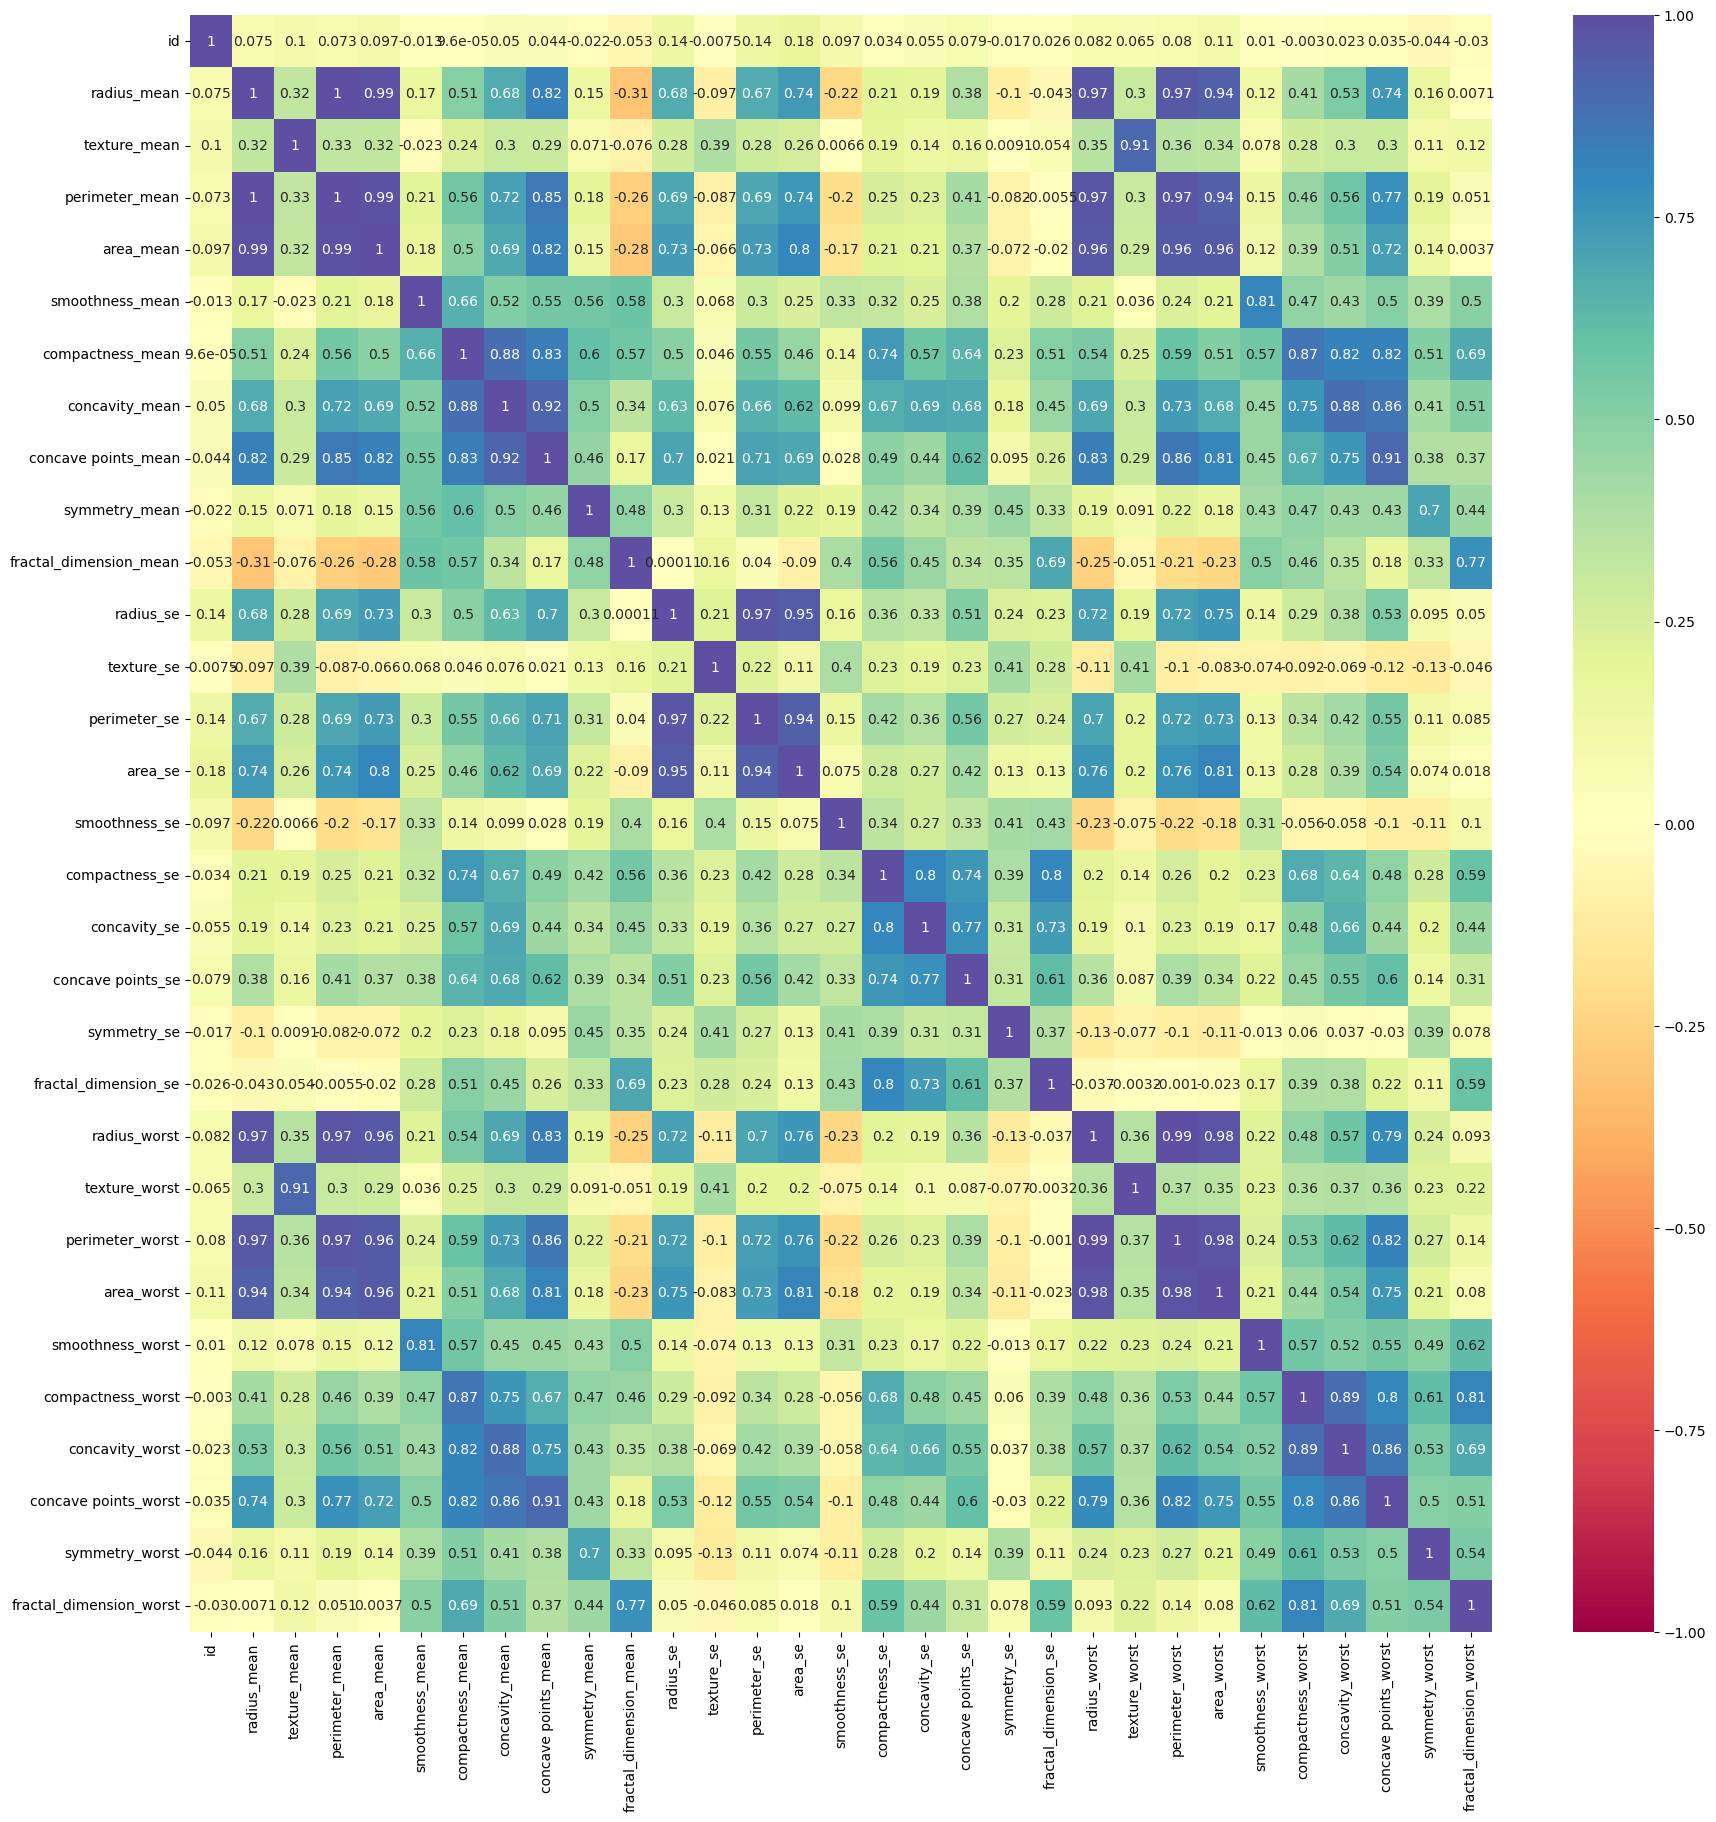

In [155]:
# check for correlation for both B and M categories

mat_cor = df.corr()

plt.figure(figsize = (21, 21))
sns.heatmap(mat_cor, annot = True, vmin = -1, vmax = 1, cmap = "Spectral");

from the above plot, even though there is no high correlation among most of the attributes, the following could be deduced among few attributes:

- there is positive relationship between radius mean and perimeter mean(99780), area mean(0.987357), compactness mean (0.506124), \n concavity mean (0.676764, concave points mean (0.822529) etc

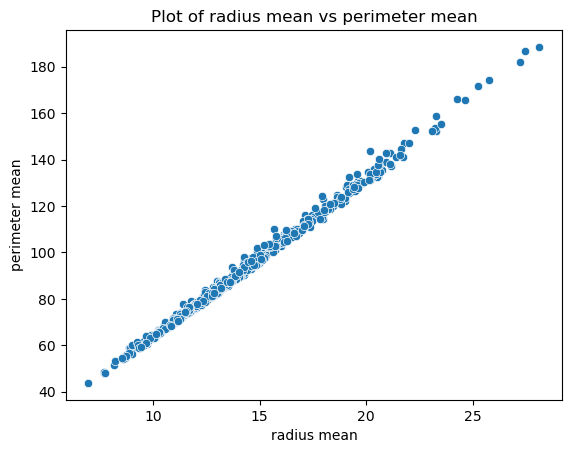

In [53]:
# radius mean against perimeter mean

sns.scatterplot(x = "radius_mean", y ="perimeter_mean", data = df);
plt.title("Plot of radius mean vs perimeter mean")
plt.xlabel("radius mean")
plt.ylabel("perimeter mean")
plt.show()

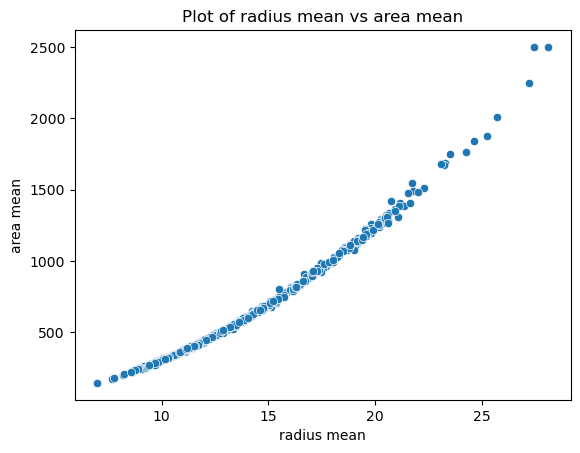

In [54]:
# radius mean against area mean

sns.scatterplot(x = "radius_mean", y ="area_mean", data = df);
plt.title("Plot of radius mean vs area mean")
plt.xlabel("radius mean")
plt.ylabel("area mean")
plt.show()

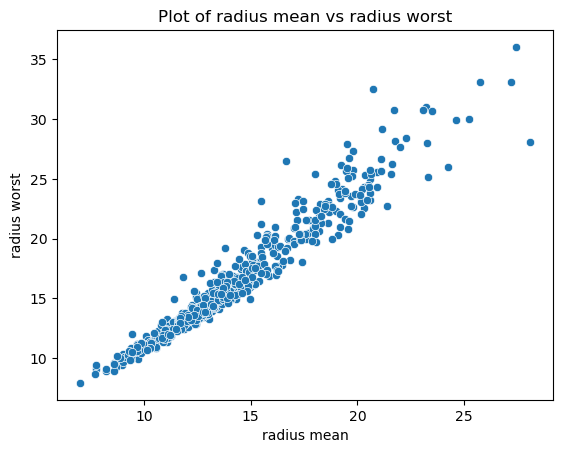

In [55]:
# radius mean against radius worst

sns.scatterplot(x = "radius_mean", y ="radius_worst", data = df);
plt.title("Plot of radius mean vs radius worst")
plt.xlabel("radius mean")
plt.ylabel("radius worst")
plt.show()

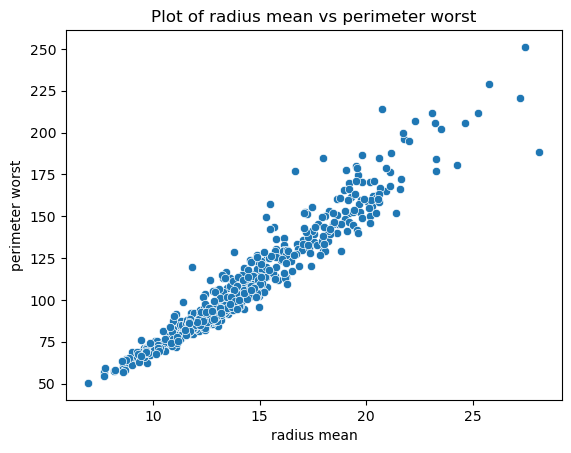

In [56]:
# radius mean against perimeter worst

sns.scatterplot(x = "radius_mean", y ="perimeter_worst", data = df);
plt.title("Plot of radius mean vs perimeter worst")
plt.xlabel("radius mean")
plt.ylabel("perimeter worst")
plt.show()

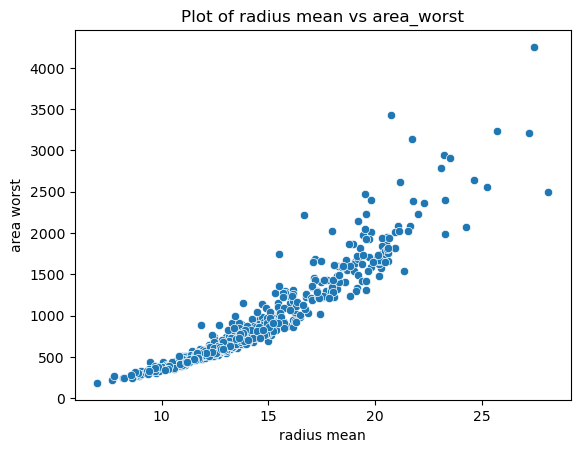

In [57]:
# radius mean against area worst

sns.scatterplot(x = "radius_mean", y ="area_worst", data = df);
plt.title("Plot of radius mean vs area_worst")
plt.xlabel("radius mean")
plt.ylabel("area worst")
plt.show()

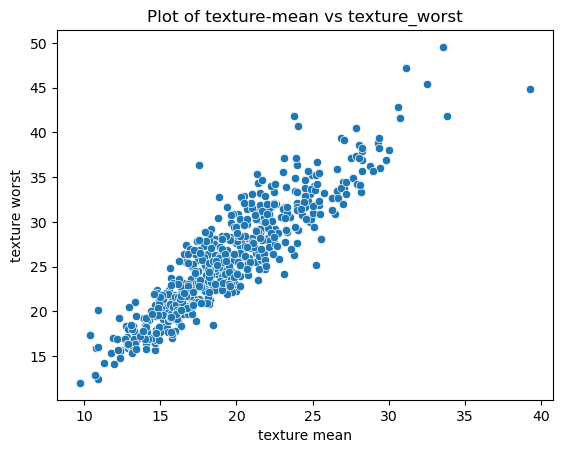

In [58]:
# texture mean against texture worst

sns.scatterplot(x = "texture_mean", y ="texture_worst", data = df);
plt.title("Plot of texture-mean vs texture_worst")
plt.xlabel("texture mean")
plt.ylabel("texture worst")
plt.show()

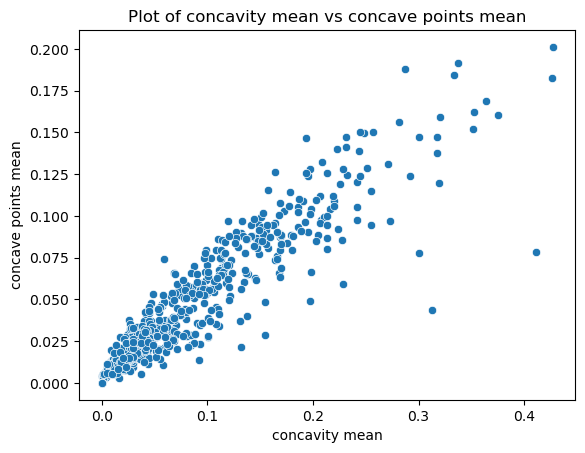

In [59]:
# concavity mean against concave points mean

sns.scatterplot(x = "concavity_mean", y ="concave points_mean", data = df);
plt.title("Plot of concavity mean vs concave points mean")
plt.xlabel("concavity mean")
plt.ylabel("concave points mean")
plt.show()

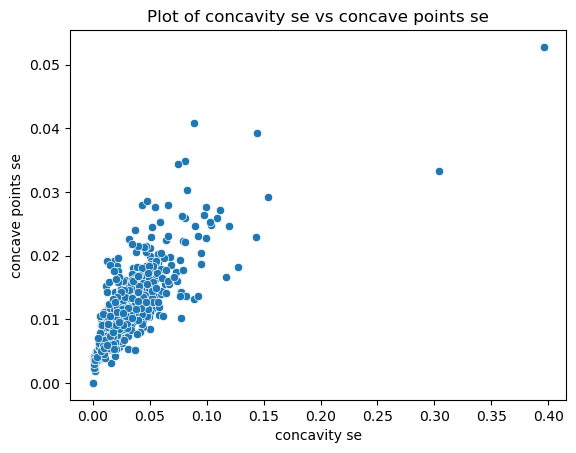

In [60]:
# concavity se against concave points se

sns.scatterplot(x = "concavity_se", y ="concave points_se", data = df);
plt.title("Plot of concavity se vs concave points se")
plt.xlabel("concavity se")
plt.ylabel("concave points se")
plt.show()

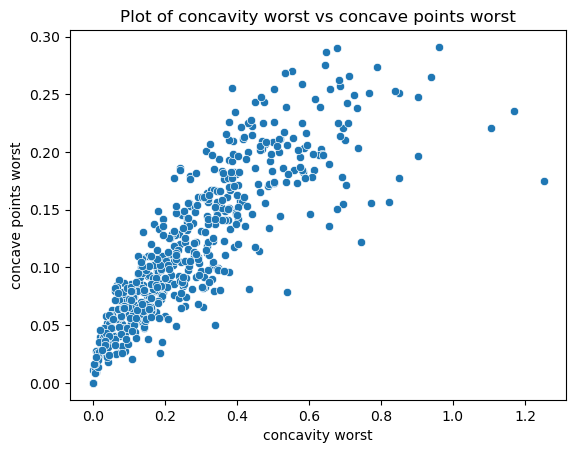

In [61]:
# concavity worst against concave points worst

sns.scatterplot(x = "concavity_worst", y ="concave points_worst", data = df);
plt.title("Plot of concavity worst vs concave points worst")
plt.xlabel("concavity worst")
plt.ylabel("concave points worst")
plt.show()

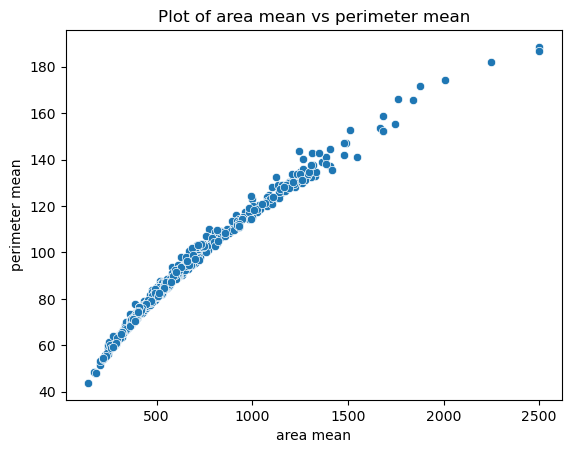

In [62]:
# perimeter mean against area_mean

sns.scatterplot(x = "area_mean", y ="perimeter_mean", data = df);
plt.title("Plot of area mean vs perimeter mean")
plt.xlabel("area mean")
plt.ylabel("perimeter mean")
plt.show()

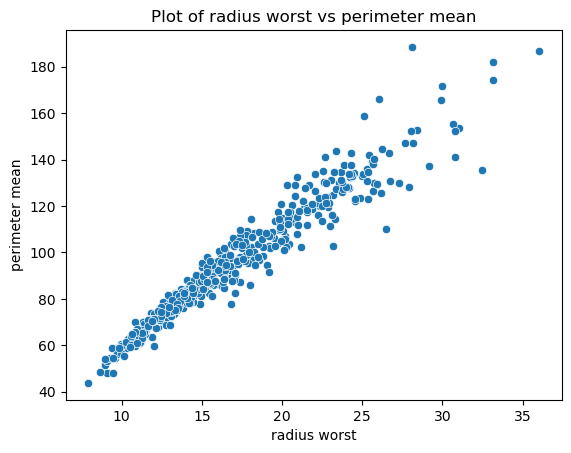

In [63]:
# perimeter mean against radius worst

sns.scatterplot(x = "radius_worst", y ="perimeter_mean", data = df);
plt.title("Plot of radius worst vs perimeter mean")
plt.xlabel("radius worst")
plt.ylabel("perimeter mean")
plt.show()

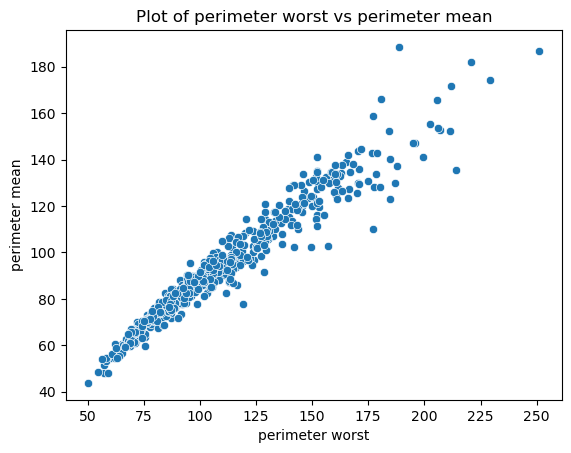

In [64]:
# perimeter mean against perimeter worst

sns.scatterplot(x = "perimeter_worst", y ="perimeter_mean", data = df);
plt.title("Plot of perimeter worst vs perimeter mean")
plt.xlabel("perimeter worst")
plt.ylabel("perimeter mean")
plt.show()

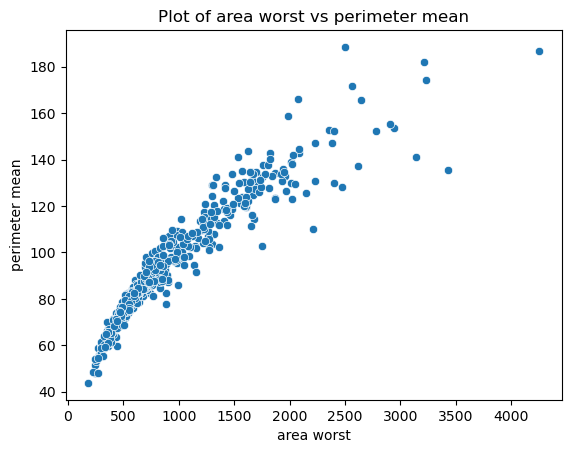

In [65]:
# area worst against perimeter worst

sns.scatterplot(x = "area_worst", y ="perimeter_mean", data = df);
plt.title("Plot of area worst vs perimeter mean")
plt.xlabel("area worst")
plt.ylabel("perimeter mean")
plt.show()

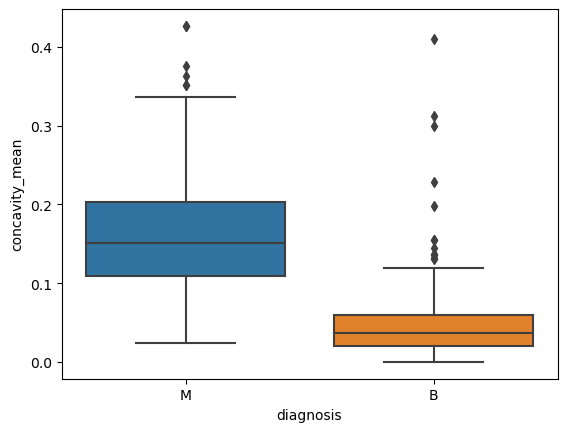

In [66]:
sns.boxplot(x = "diagnosis", y ="concavity_mean", data = df);

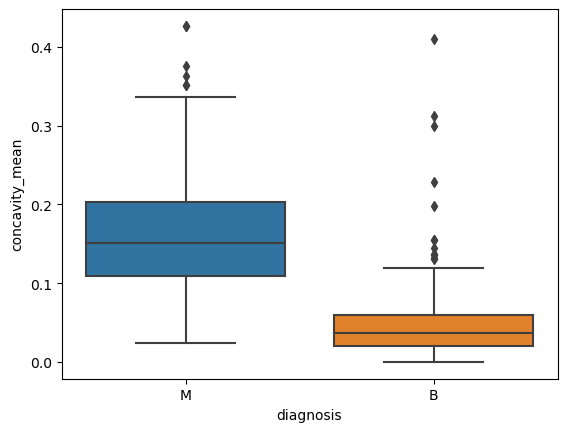

In [66]:
sns.boxplot(x = "diagnosis", y ="concavity_mean", data = df);

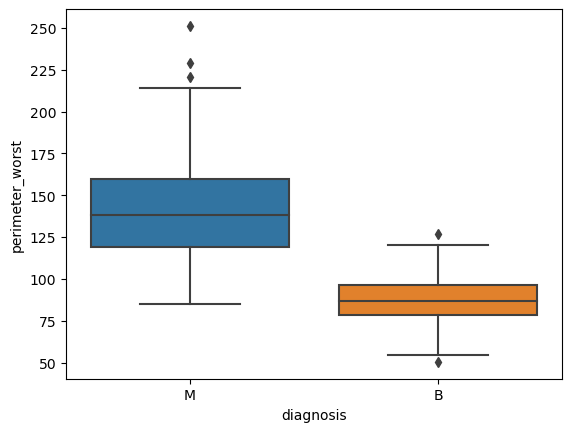

In [6]:
sns.boxplot(x = "diagnosis", y ="perimeter_worst", data = df);

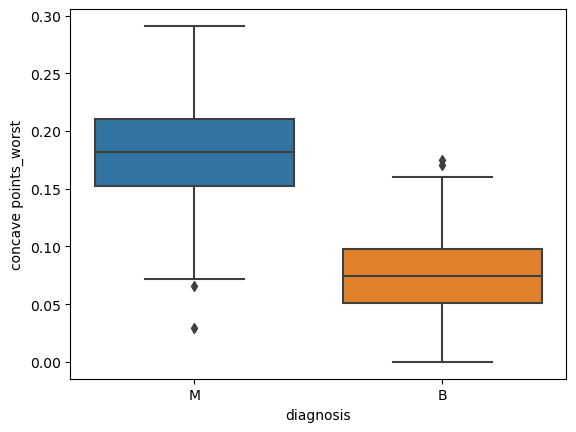

In [7]:
sns.boxplot(x = "diagnosis", y ="concave points_worst", data = df);

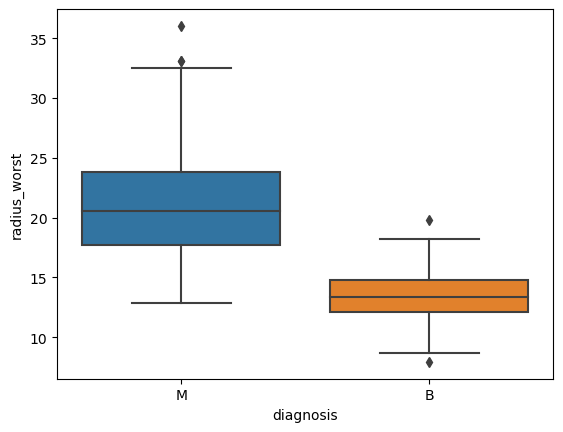

In [8]:
sns.boxplot(x = "diagnosis", y ="radius_worst", data = df);

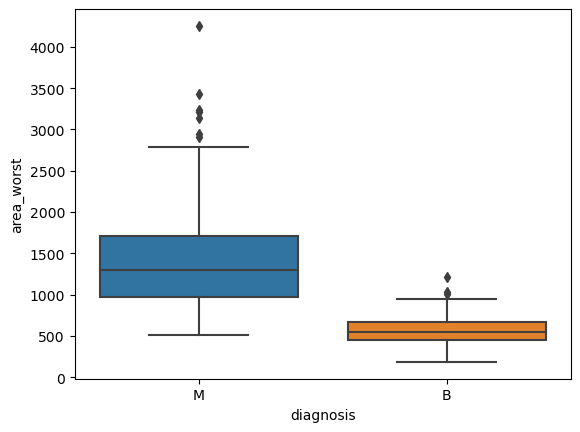

In [9]:
sns.boxplot(x = "diagnosis", y ="area_worst", data = df);

### splitting the data

- 80% of the data for training and 20% for testing



In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (precision_score, accuracy_score, recall_score, f1_score)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler

In [68]:
# select the features and the target

X = df.drop(["diagnosis", "id"], axis = 1)
y = df["diagnosis"]

In [74]:
# encoding the target to 0 and 1

from sklearn.preprocessing import LabelEncoder
from collections import Counter

In [75]:
le = LabelEncoder()

y_encoder = le.fit_transform(y)

In [76]:
Counter(y_encoder)

Counter({1: 212, 0: 357})

Observation:

- 1 represents M class while 0 represents B class
- there is no need to perform OneHotEncoding on the selected features (30 features) because they are numeric values.

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y_encoder, test_size = 0.2, random_state = 0)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)

# stratify

# random state

In [84]:
x_train.shape

(364, 30)

In [85]:
x_test.shape

(114, 30)

In [86]:
x_val.shape

(91, 30)

Note: you do not need to normalize your data for Tree Based Models because it is a non-linear model.

In [90]:
# # check for split of the data

# y_train.value_counts(normalize = True)

In [91]:
# y_test.value_counts(normalize = True)

In [92]:
# # minmaxscaler will be used to normalize the data between 0 and 1.

# scaler = MinMaxScaler()

# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)

In [93]:
# x_train.shape

### Implementing Random Forests In Scikit-learn

In [101]:
# import the random forest model

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instantiate the classifier
rf = RandomForestClassifier(random_state = 0)

# train the model
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

Note:
    
- default parameters are used for the model and you are welcome to change the following parameters:
    
- the n_estimator, which is by default 100.the higher the n_estimator value, the better the model. \n
Also, the higher the tree, the more complex the model becomes.

- another parameter is max_dept, which the default value is none: a model with a deep dept will be prone to overfitting.\n
max_dept between 4 and 5 is always better.

In [103]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix

### Model performance check

In [104]:
# function to compute different metrics to check performance of a tree based model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check tree based model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class, average = "weighted")  # to compute recall
    precision = precision_score(target, pred_class, average="weighted")  # to compute precision
    f1 = f1_score(target, pred_class, average="weighted")  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

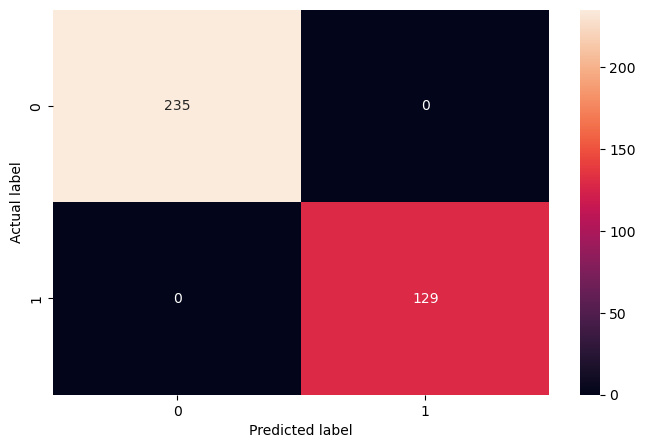

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [105]:
# performance scores

rf_train = model_performance_classification(rf, x_train, y_train)
rf_train

Observations:
    
     - the random forest model generalizes well with the training data set using the default parameters (n_estimators = 100 and max_depth = none)

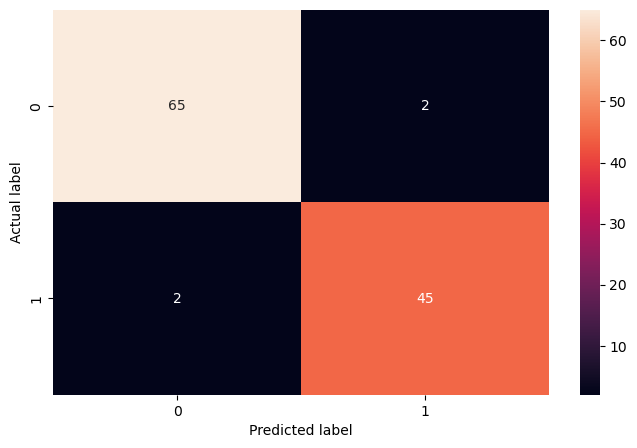

,Accuracy,Recall,Precision,F1-score
0,0.964912,0.964912,0.964912,0.964912


In [106]:
rf_test = model_performance_classification(rf, x_test, y_test)
rf_test

Observations:
    
- this model still generalizes well with the testing dataset with the default parameters (n_estimator =100 and max_depth = none) even though the accuracy value of both training and testing are slightly different (rf_training 100% and rf_testing 96.49%). 

### Rebuild The Random Forest Model By Tuning max_depth = none to max_depth = 4

In [109]:
# instantiate the classifier
rf2 = RandomForestClassifier(random_state = 0, max_depth = 4)

# train the model
rf2.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

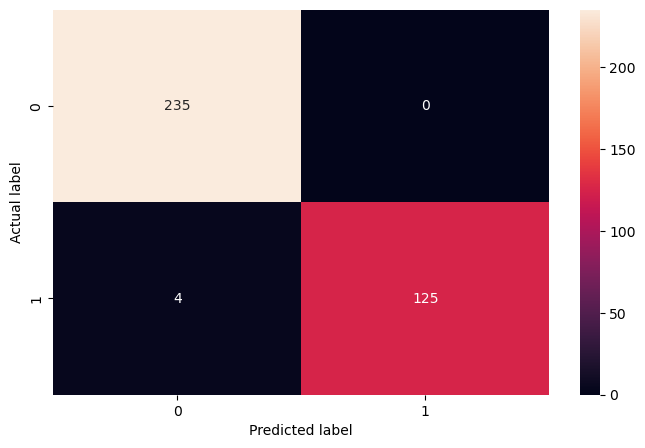

,Accuracy,Recall,Precision,F1-score
0,0.989011,0.989011,0.989195,0.988971


In [110]:
rf2_train = model_performance_classification(rf2, x_train, y_train)
rf2_train

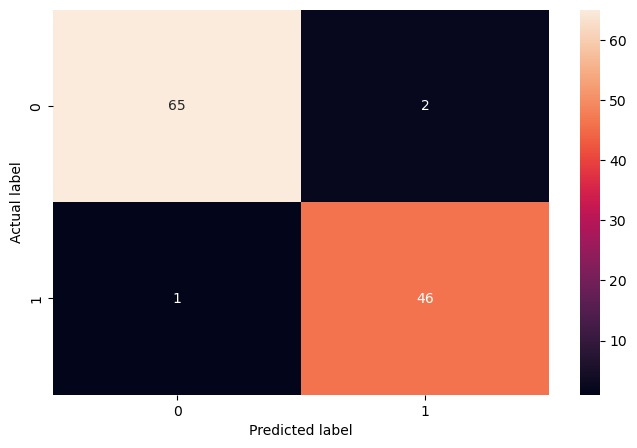

,Accuracy,Recall,Precision,F1-score
0,0.973684,0.973684,0.973917,0.973724


In [111]:
rf2_test = model_performance_classification(rf2, x_test, y_test)
rf2_test

### Visualizing features importance for the Random Forests Algorithm

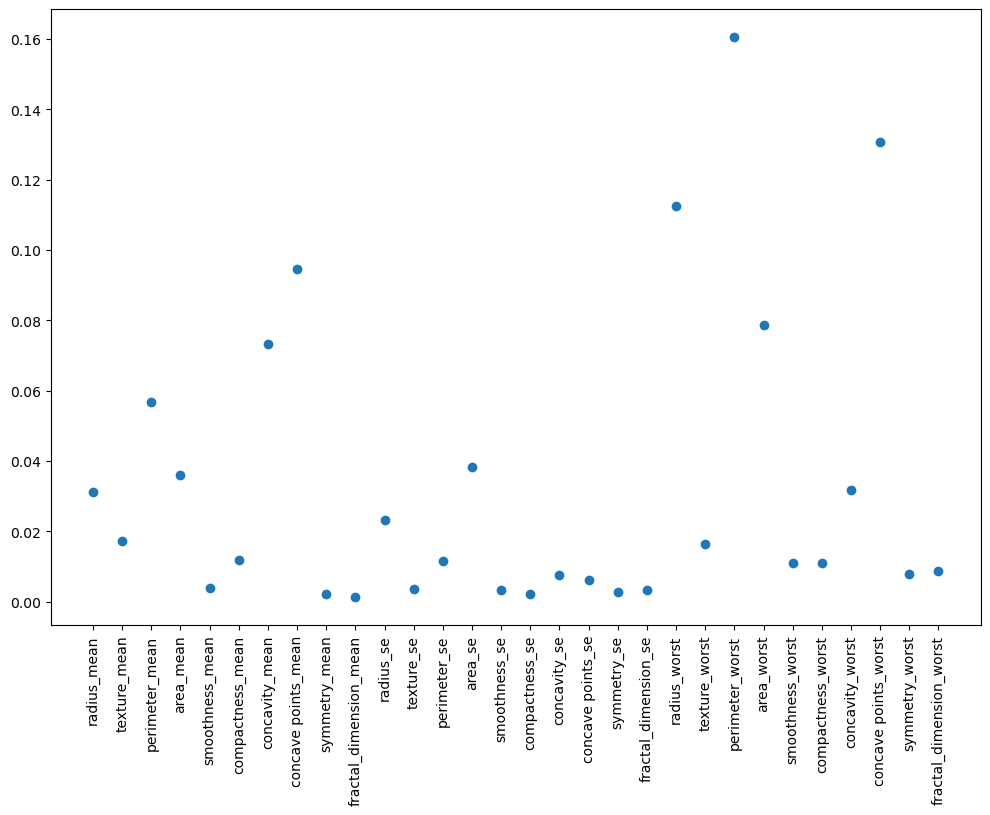

In [118]:
# import the feature importance function

plt.figure(figsize = (12, 8))
plt.plot(rf2.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

In [120]:
feature_names = x_train.columns.to_list()

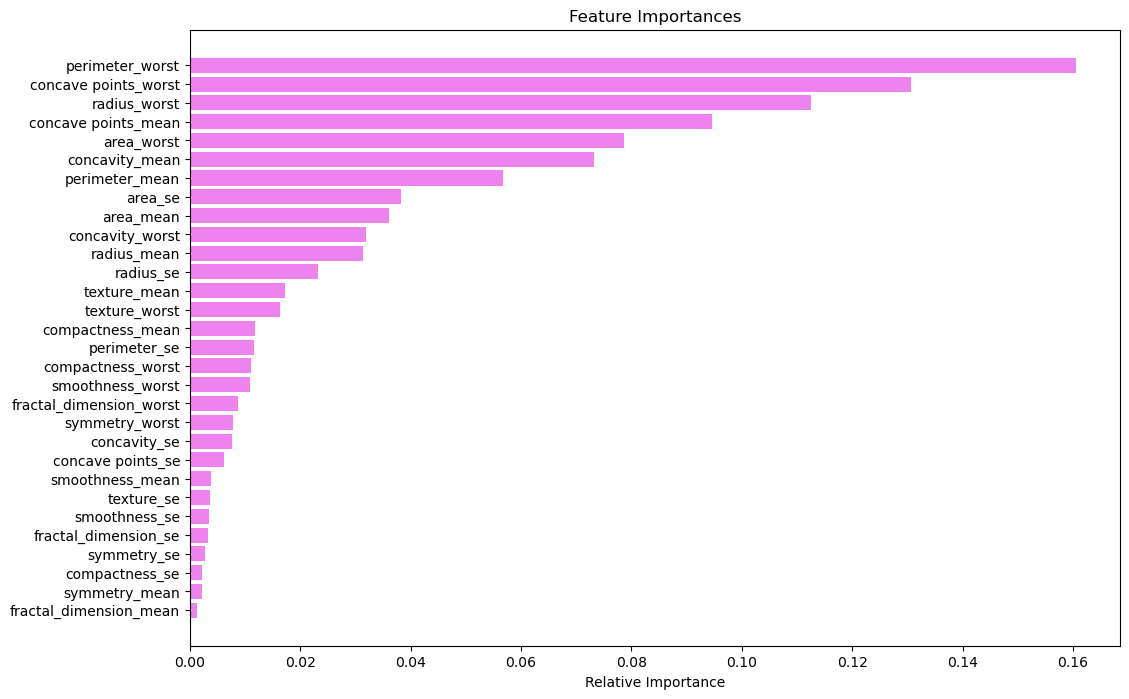

In [122]:
importances = rf2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "violet", 
         align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Implementing Gradient Boosting In Scikit-learn

In [123]:
# import the gradient boosting model

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instantiate the classifier
gb = GradientBoostingClassifier(random_state = 0)

# train the model
gb.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

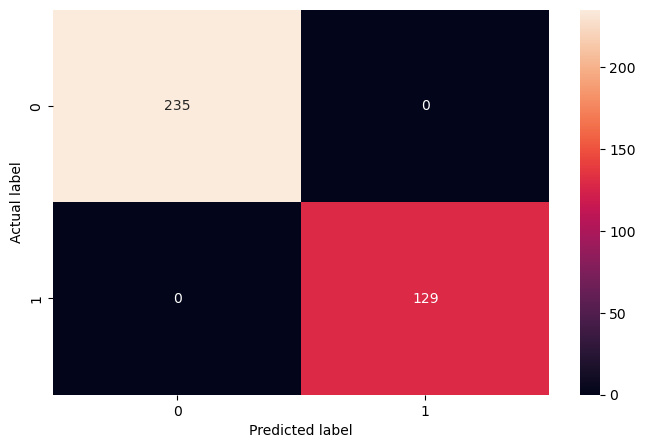

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [124]:
# performance scores

gb_train = model_performance_classification(gb, x_train, y_train)
gb_train

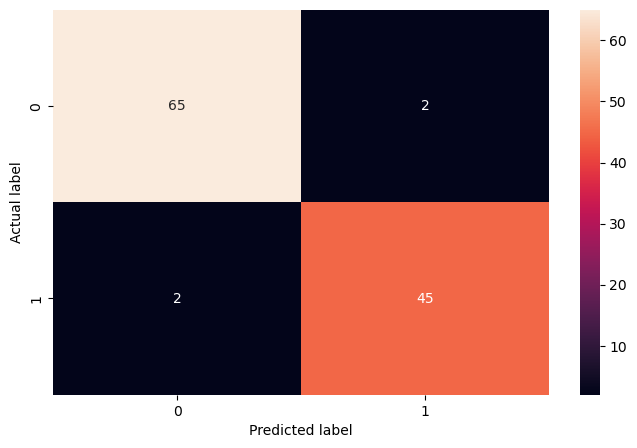

,Accuracy,Recall,Precision,F1-score
0,0.964912,0.964912,0.964912,0.964912


In [125]:
gb_test = model_performance_classification(gb, x_test, y_test)
gb_test

Observations:
    
- this model still generalizes well with the testing dataset using the default parameters (n_estimator =100, learning_rate = 0.1 and max_depth = 3) even though the accuracy value of both training and testing are slightly different (rf_training 100% and rf_testing 96.49%). Also, accuracy, recall, precision and f1-score have the same values with the training and testing dataset of random forests model with default parameters.

### Rebuild The Gradient Boosting Model By Tuning max_depth = 3 to maxt_depth = 4

In [126]:
# instantiate the classifier
gb2 = GradientBoostingClassifier(random_state = 0, max_depth = 4)

# train the model
gb2.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=4, random_state=0)

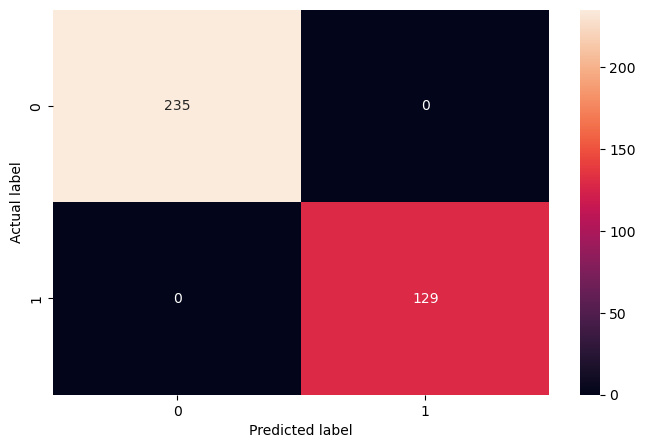

,Accuracy,Recall,Precision,F1-score
0,1.0,1.0,1.0,1.0


In [127]:
gb2_train = model_performance_classification(gb2, x_train, y_train)
gb2_train

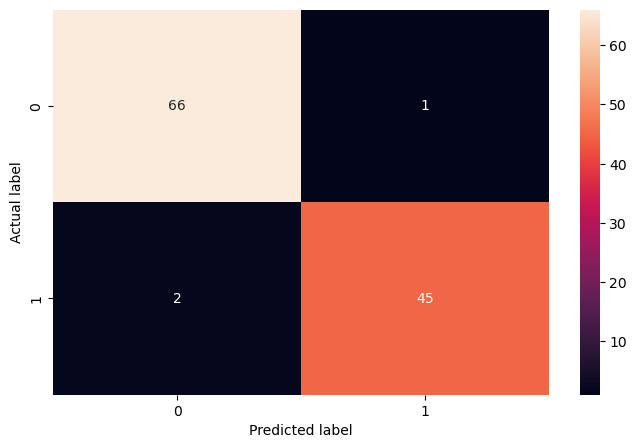

,Accuracy,Recall,Precision,F1-score
0,0.973684,0.973684,0.973752,0.97364


In [129]:
gb2_test = model_performance_classification(gb2, x_test, y_test)
gb2_test

### Visualizing features importance for the Gradient Boosting Algorithm

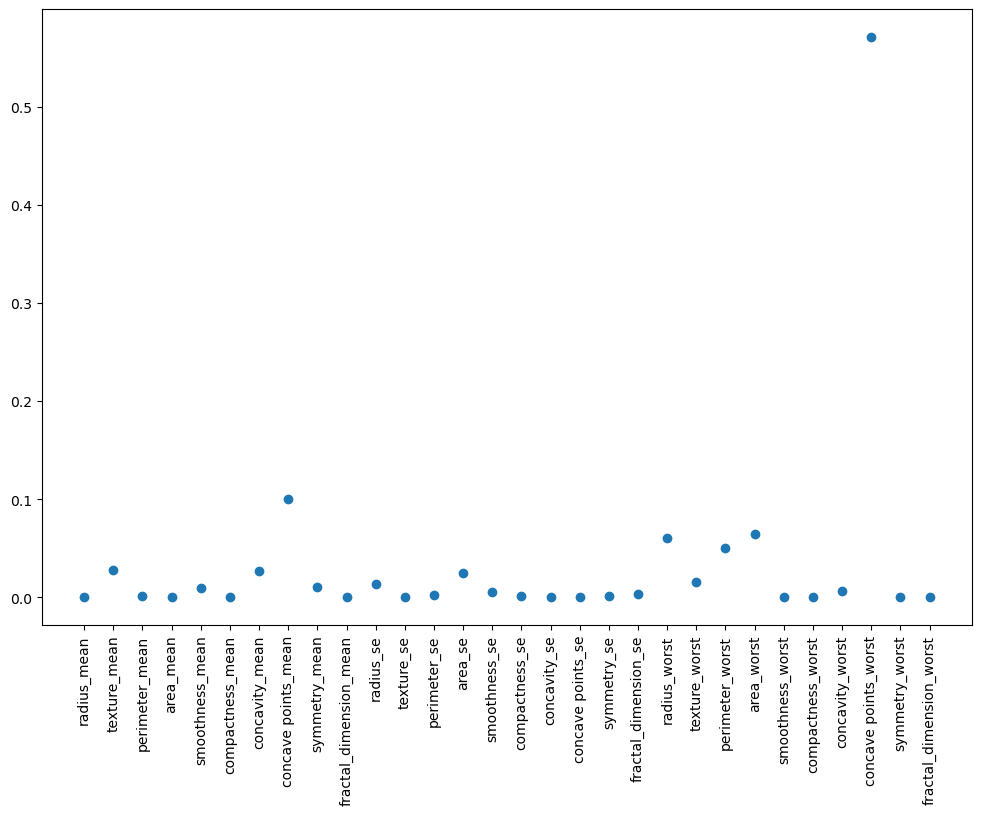

In [130]:
# import the feature importance function

plt.figure(figsize = (12, 8))
plt.plot(gb2.feature_importances_, 'o')
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

In [ ]:
feature_names = x_train.columns.to_list()

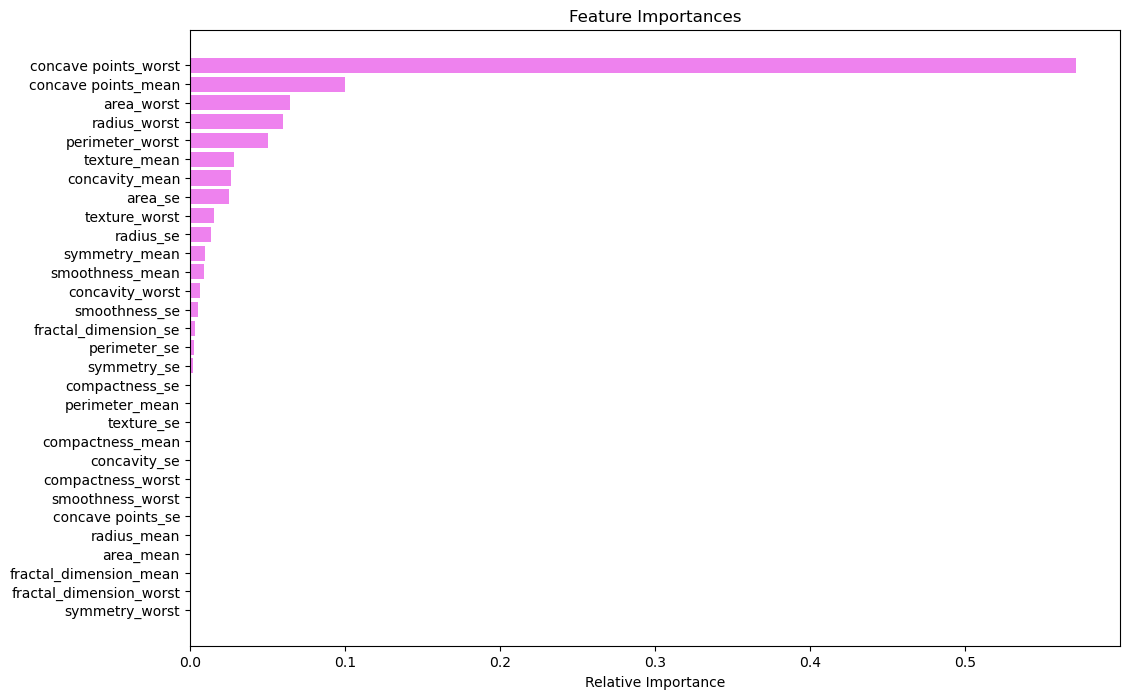

In [131]:
importances = gb2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color = "violet", 
         align = "center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Implementing Principal Component Analysis (PCA) in sklearn

#### Import required packages

In [134]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [136]:
# select numerical variables

num_var = df.select_dtypes(include = "number")
num_var

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [138]:
x = num_var.drop("id", axis = 1)
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [139]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Standardize the data

In [140]:
# scale/normalize the data

scaler = StandardScaler()

x_sd = scaler.fit_transform(x)

### Implementing PCA on the data

In [141]:
# create an instance of the PCA 
pca = PCA(random_state = 0) # you have to choose the number of components (n_components), if not, by default, \n
# it will return the number of attributes/features

# transform the data with PCA
x_pca = pca.fit_transform(x_sd)

# check the shape of both the original data and the transformed one
print(f"Shape of Original Data: {x_sd.shape}")
print(f"Shape of PCA Data: {x_pca.shape}")

Shape of Original Data: (569, 30)
Shape of PCA Data: (569, 30)


In [142]:
# obtain the principal components

pca.components_

array([[ 2.18902444e-01,  1.03724578e-01,  2.27537293e-01,
         2.20994985e-01,  1.42589694e-01,  2.39285354e-01,
         2.58400481e-01,  2.60853758e-01,  1.38166959e-01,
         6.43633464e-02,  2.05978776e-01,  1.74280281e-02,
         2.11325916e-01,  2.02869635e-01,  1.45314521e-02,
         1.70393451e-01,  1.53589790e-01,  1.83417397e-01,
         4.24984216e-02,  1.02568322e-01,  2.27996634e-01,
         1.04469325e-01,  2.36639681e-01,  2.24870533e-01,
         1.27952561e-01,  2.10095880e-01,  2.28767533e-01,
         2.50885971e-01,  1.22904556e-01,  1.31783943e-01],
       [-2.33857132e-01, -5.97060883e-02, -2.15181361e-01,
        -2.31076711e-01,  1.86113023e-01,  1.51891610e-01,
         6.01653628e-02, -3.47675005e-02,  1.90348770e-01,
         3.66575471e-01, -1.05552152e-01,  8.99796818e-02,
        -8.94572342e-02, -1.52292628e-01,  2.04430453e-01,
         2.32715896e-01,  1.97207283e-01,  1.30321560e-01,
         1.83848000e-01,  2.80092027e-01, -2.19866379e-

### Explained Variance Ratio
- This refers to the percent of the variation in the data explained by the principal components 

In [143]:
pca.explained_variance_ratio_[:].sum() # using 30 attributes/features

1.0

In [144]:
pca.explained_variance_ratio_[:25].sum() # using 25 attributes/features

0.9994150236823041

In [145]:
pca.explained_variance_ratio_[:20].sum() # using 20 attributes/features

0.9955720432628136

In [146]:
pca.explained_variance_ratio_[:15].sum() # using 15 attributes/features

0.9864881227145468

In [148]:
pca.explained_variance_ratio_[:10].sum() # using 10 attributes/features

0.9515688143366666

- This simply means that the first ten of the attributes were able to explain 95.15% information in the original data the new principal components explained.

### Get the Optimal number of components

In [147]:
optimal_comp = []

for n_comp in range(1, x.shape[1] + 1):
    pca = PCA(n_components = n_comp)
    x_pca = pca.fit_transform(x_sd)
    pca_exp = pca.explained_variance_ratio_.sum()
    print(f"No of Components: {n_comp}, PCA_explained: {pca_exp}")

No of Components: 1, PCA_explained: 0.4427202560752644
No of Components: 2, PCA_explained: 0.6324320765155942
No of Components: 3, PCA_explained: 0.7263637090822103
No of Components: 4, PCA_explained: 0.7923850582445926
No of Components: 5, PCA_explained: 0.8473427431680536
No of Components: 6, PCA_explained: 0.8875879635668859
No of Components: 7, PCA_explained: 0.910095300696
No of Components: 8, PCA_explained: 0.9259825386932458
No of Components: 9, PCA_explained: 0.9398790324178976
No of Components: 10, PCA_explained: 0.9515688143213612
No of Components: 11, PCA_explained: 0.9613660042088148
No of Components: 12, PCA_explained: 0.9700713832117334
No of Components: 13, PCA_explained: 0.978116633091202
No of Components: 14, PCA_explained: 0.9833502905448358
No of Components: 15, PCA_explained: 0.9864881227031735
No of Components: 16, PCA_explained: 0.9891502160777358
No of Components: 17, PCA_explained: 0.991130184005022
No of Components: 18, PCA_explained: 0.9928841434552499
No of C

### RE-build PCA

In [149]:
pca2 = PCA(n_components = 10) # tuning n_components to 10

x_pca2 = pca2.fit_transform(x)

#### Get correlation between principal components and original data

In [150]:
pd.DataFrame(data=[[np.corrcoef(x[c], x_pca2[: , n])[1,0] 
               for n in range(pca2.n_components_)] for c in x],
             columns=["First", "Second", "Third", "Fourth", "Fifth", "Sixth", "Seventh", "Eighth", "Nineth", "Tenth"],
             index = x.columns)

,First,Second,Third,Fourth,Fifth,Sixth,Seventh,Eighth,Nineth,Tenth
radius_mean,0.961478,0.225319,-0.092918,-0.071822,0.063545,-0.064540,0.012813,-0.013056,-0.039228,0.011482
texture_mean,0.340218,-0.057283,-0.039199,-0.622907,-0.650798,-0.086038,-0.245675,-0.009741,0.000374,0.005168
perimeter_mean,0.961637,0.220787,-0.078249,-0.100177,0.081455,-0.059945,0.010484,0.002106,0.002156,-0.001064
area_mean,0.978348,0.206954,-0.002103,0.000828,-0.000826,0.000258,-0.000028,-0.000005,-0.000004,0.000002
smoothness_mean,0.200690,-0.090091,0.137062,-0.180896,0.260023,-0.050101,0.154043,0.148927,0.230681,-0.091672
compactness_mean,0.511187,-0.004353,0.051115,-0.420611,0.302131,-0.033323,0.007069,0.179720,0.420502,-0.164407
concavity_mean,0.684723,0.080589,0.088518,-0.316007,0.173917,0.005992,0.017301,0.147181,0.347407,-0.101630
concave points_mean,0.820304,0.102129,0.024646,-0.237618,0.184248,-0.025746,0.031440,0.142510,0.195635,-0.077979
symmetry_mean,0.171997,-0.078728,0.136733,-0.260708,0.215875,-0.011346,0.029405,0.203421,0.215624,-0.087548
fractal_dimension_mean,-0.247353,-0.195205,0.190275,-0.208565,0.185197,0.054008,-0.008122,0.259753,0.426649,-0.186550
